![](https://www.aeef.es/wp-content/uploads/2020/12/komvida-logo.jpg)
# **Proyecto de Análisis de las ventas semanales de cada cliente**
Este proyecto tiene como objetivo desarrollar un modelo de pronóstico para prever las ventas semanales de cada cliente para el año 2024, basándote en los datos históricos de 2022 y 2023. El pronóstico debe considerar diferencias por formatos de producto (250 ml y 750 ml) e incluir todas las semanas del año.

## Fuentes de datos
Conjunto de datos en Excel con ventas semanales de clientes durante los años 2022 y 2023. Este archivo incluye columnas de cliente, formato del producto, año, semana y número de botellas vendidas.


In [182]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd


#visualización de datos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings

warnings.filterwarnings("ignore")

In [183]:
# Leemos los datos
df = pd.read_excel('Fichero base clientes.xlsx')

# Eliminamos las filas duplicadas
df_drop_duplicates = df.drop_duplicates()

df_drop_duplicates.head(10)
df_drop_duplicates.columns = [column.lower().replace(' ', '_').replace('º', '') for column in df_drop_duplicates.columns]
df_drop_duplicates

,cliente,formato_ml,año,semna,n_botellas
0,Nombre1,250,2023,40,336
1,Nombre1,250,2024,7,192
2,Nombre1,250,2023,42,180
3,Nombre2,250,2024,3,648
4,Nombre2,250,2024,4,648
...,...,...,...,...,...
10003,Nombre568,250,2022,35,1740
10004,Nombre568,250,2022,44,1728
10005,Nombre568,250,2023,1,1752
10006,Nombre568,250,2022,24,1728


In [184]:
# Información de datos
df_drop_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10007 entries, 0 to 10007
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cliente     10007 non-null  object
 1   formato_ml  10007 non-null  int64 
 2   año         10007 non-null  int64 
 3   semna       10007 non-null  int64 
 4   n_botellas  10007 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 469.1+ KB


In [185]:
print(f'Número de filas con valores nulos: {df_drop_duplicates.isnull().any(axis=1).mean()}')


Número de filas con valores nulos: 0.0


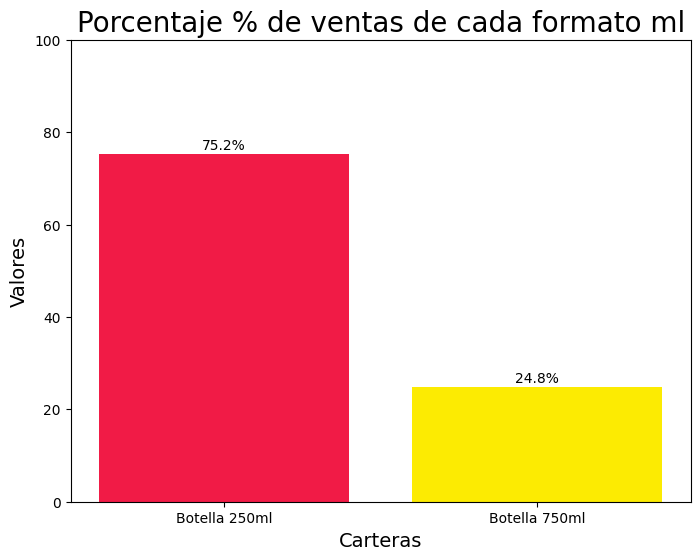

In [186]:
data = [round(sum(df_drop_duplicates['formato_ml'] ==250 )/len(df_drop_duplicates)*100, 2),
        round(sum(df_drop_duplicates['formato_ml'] ==750 )/len(df_drop_duplicates)*100, 2)]
labels = ['Botella 250ml', 'Botella 750ml']
colors = ['#f11b46', '#fceb02']  # Lista de colores para cada barra
fig = plt.figure(figsize=(8, 6))  # Definir el tamaño de la figura (ancho x alto)

plt.bar(labels, data, color=colors)
plt.xlabel('Carteras', fontsize = 14)
plt.ylabel('Valores' , fontsize = 14)
plt.title('Porcentaje % de ventas de cada formato ml', fontsize = 20)
plt.ylim(0, 100)  # Establecer límites del eje y

# Agregar porcentaje encima de cada barra
for i in range(len(data)):
    plt.text(i, data[i] + 1, f'{data[i]}%', ha='center')
plt.show()


In [187]:
def plot_boxplot_with_outliers(dataframe, x_col, y_col, figsize=(30, 20)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=x_col, y=y_col, data=dataframe, ax=ax)

    groups = dataframe[x_col].unique()

    # Calcula el rango intercuartílico por grupo
    group_iqr = dataframe.groupby(x_col)[y_col].quantile(0.80) - dataframe.groupby(x_col)[y_col].quantile(0.20)

    # Define el límite superior e inferior para detectar outliers
    lower_limit = dataframe.groupby(x_col)[y_col].quantile(0.20) - 1.5 * group_iqr
    upper_limit = dataframe.groupby(x_col)[y_col].quantile(0.80) + 1.5 * group_iqr

    for i, group in enumerate(groups):
        outlier_mask = (dataframe[x_col] == group) & ((dataframe[y_col] < lower_limit[group]) | (dataframe[y_col] > upper_limit[group]))
        outliers = dataframe.loc[outlier_mask, y_col]
        ax.plot([i] * len(outliers), outliers, 'ro', markersize=5)

        # Calcula las estadísticas por grupo
        group_data = dataframe.loc[dataframe[x_col] == group, y_col]
        min_value = round(group_data.min())
        max_value = round(group_data.max())
        mean_value = round(group_data.mean(), 2)
        median_value = round(group_data.median(), 2)

        # Agrega las etiquetas de mínimo, máximo y media al gráfico
        ax.text(i, min_value, f'Mínimo: {min_value}', ha='center', va='top', color='black', fontsize=12)
        ax.text(i, max_value, f'Máximo: {max_value}', ha='center', va='bottom', color='black', fontsize=12)
        ax.text(i, mean_value, f'Media: {mean_value}', ha='center', va='bottom', color='black', fontsize=12)
        ax.text(i, median_value, f'Mediana: {median_value}', ha='center', va='bottom', color='black', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(x_col, fontsize=30)
    ax.set_ylabel(y_col, fontsize=30)
    ax.set_title(f'Boxplot por {x_col}', fontsize=40)
    plt.show()


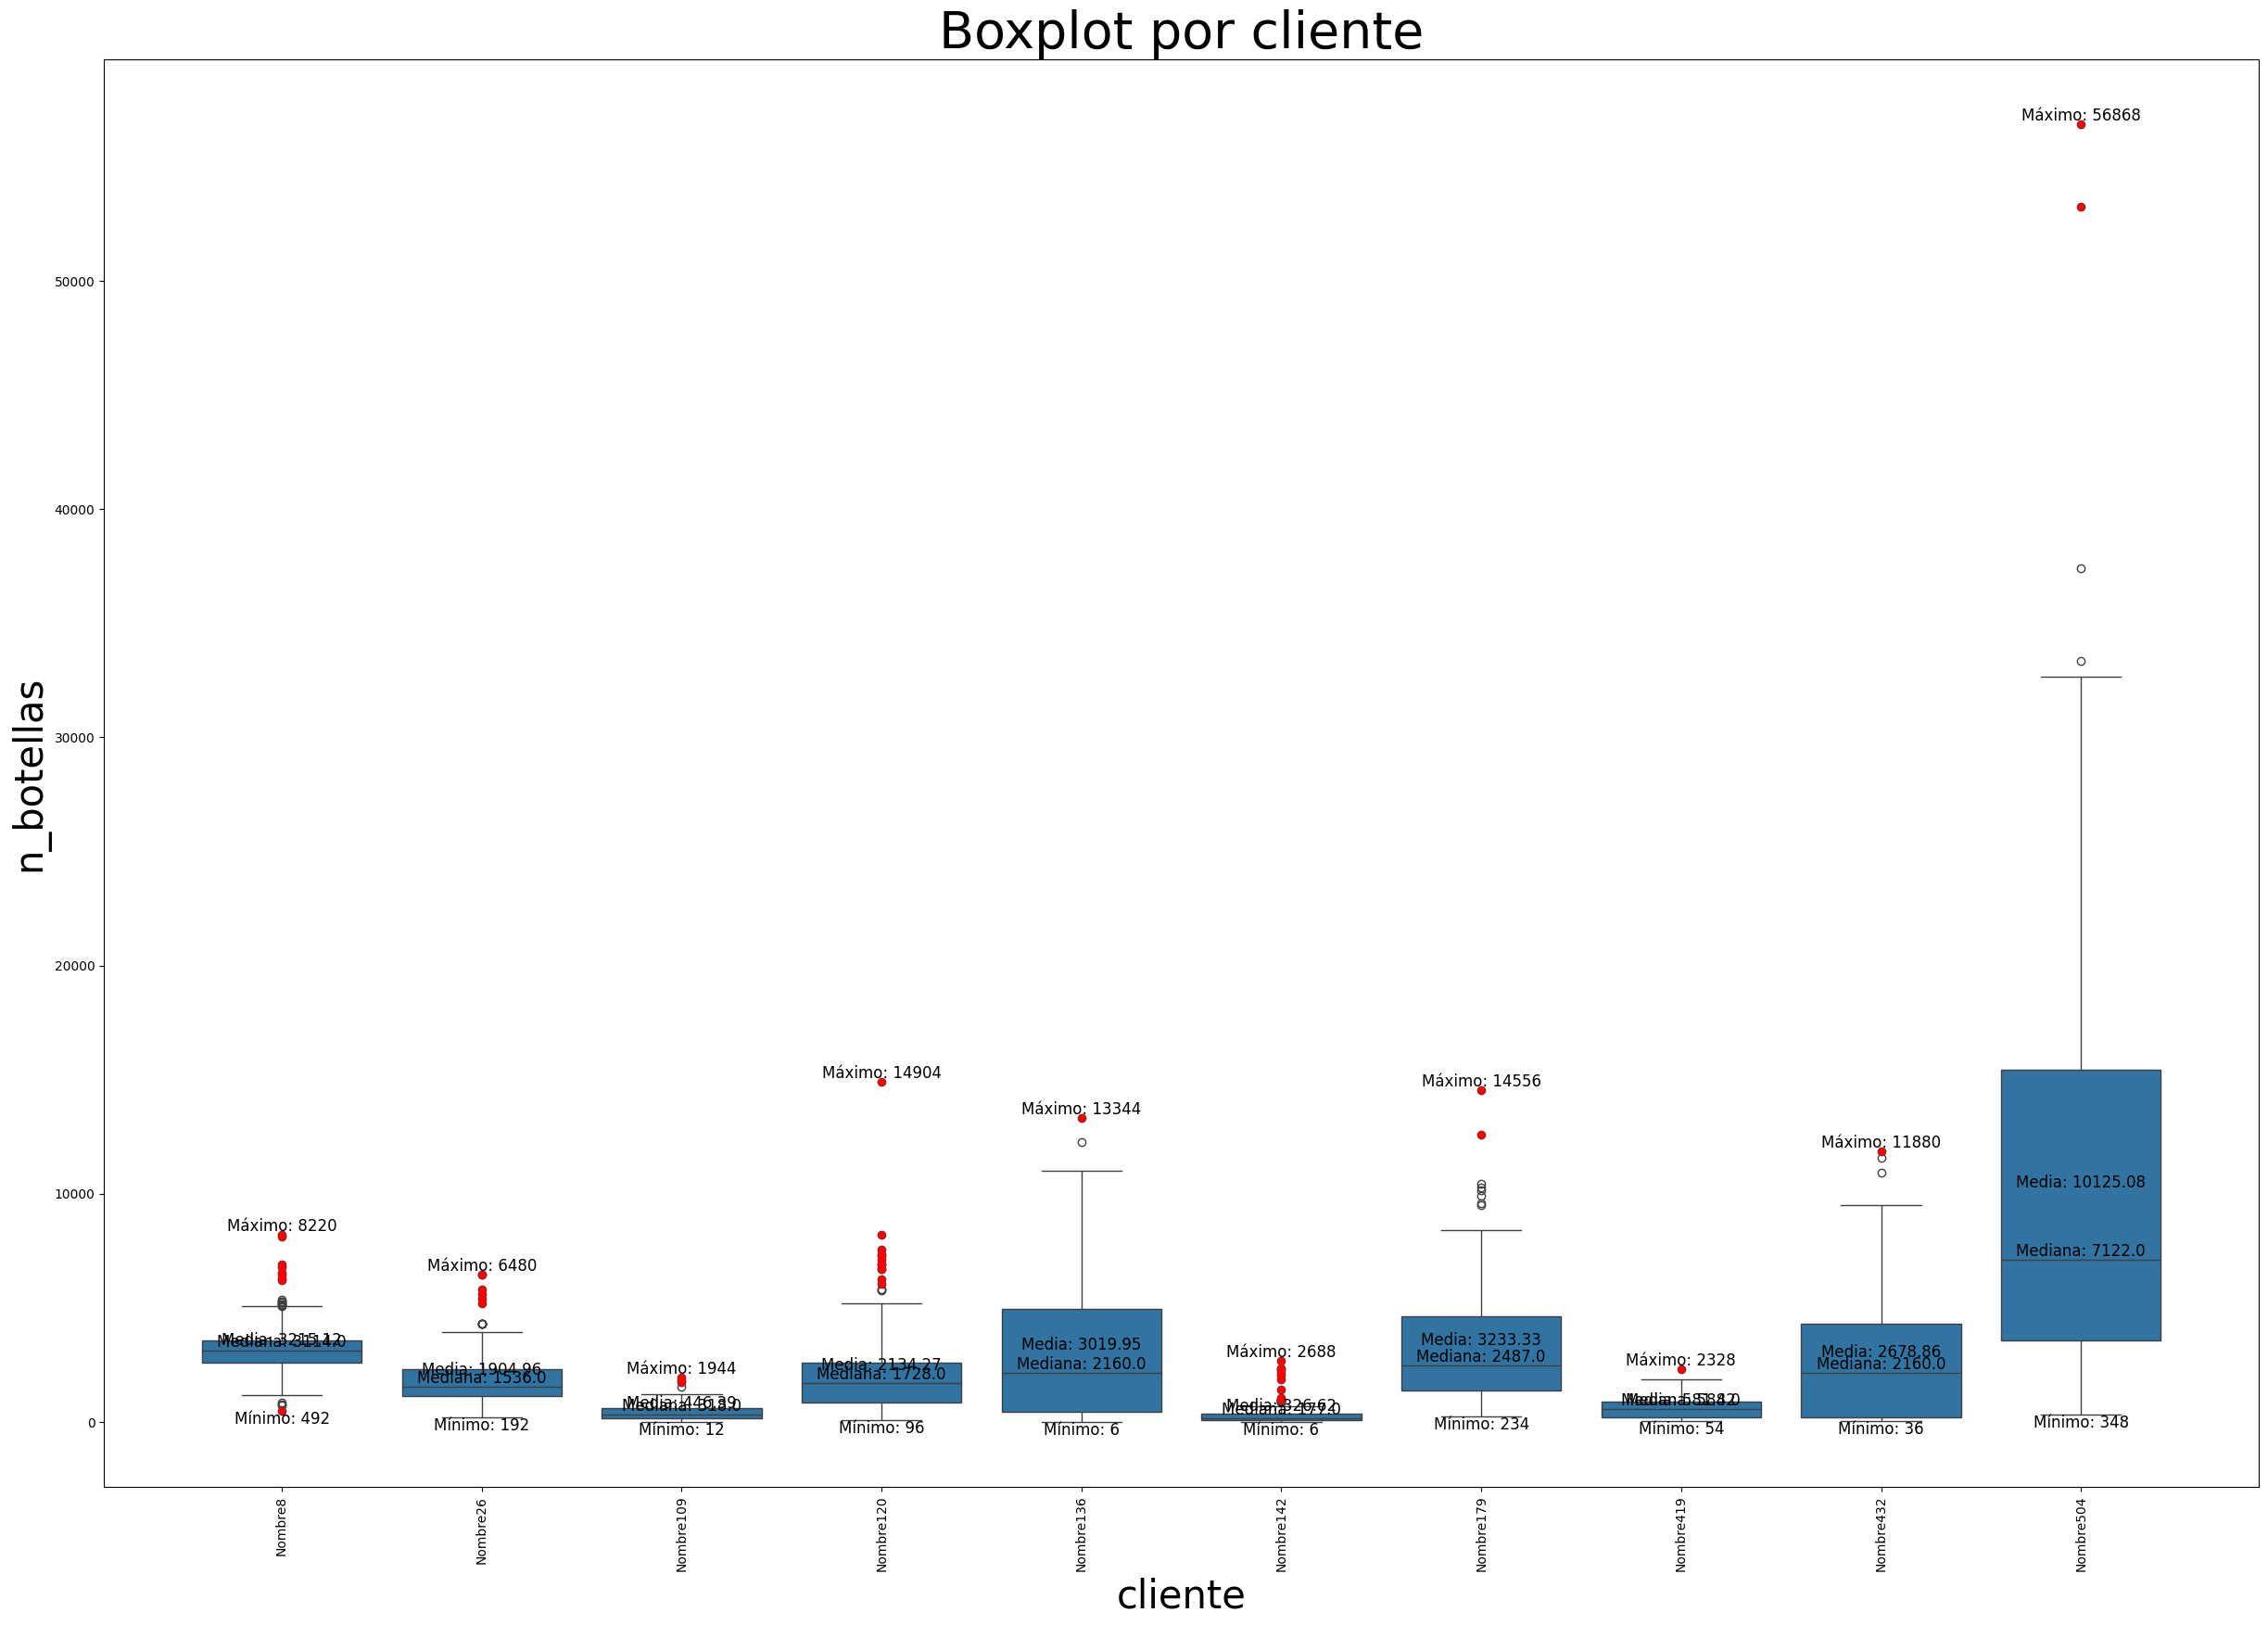

In [188]:
# Seleccionamos los 10 clientes con más ventas para hacernos una idea de como está la distribución y para poder identificar los Outliers 
cliente_top_10 = df_drop_duplicates.cliente.value_counts().head(10).index.tolist()

plot_boxplot_with_outliers(df_drop_duplicates[df_drop_duplicates['cliente'].isin(cliente_top_10)], 'cliente', 'n_botellas')

In [189]:
df

,Cliente,Formato ml,Año,Semna,Nº botellas
0,Nombre1,250,2023,40,336
1,Nombre1,250,2024,7,192
2,Nombre1,250,2023,42,180
3,Nombre2,250,2024,3,648
4,Nombre2,250,2024,4,648
...,...,...,...,...,...
10003,Nombre568,250,2022,35,1740
10004,Nombre568,250,2022,44,1728
10005,Nombre568,250,2023,1,1752
10006,Nombre568,250,2022,24,1728


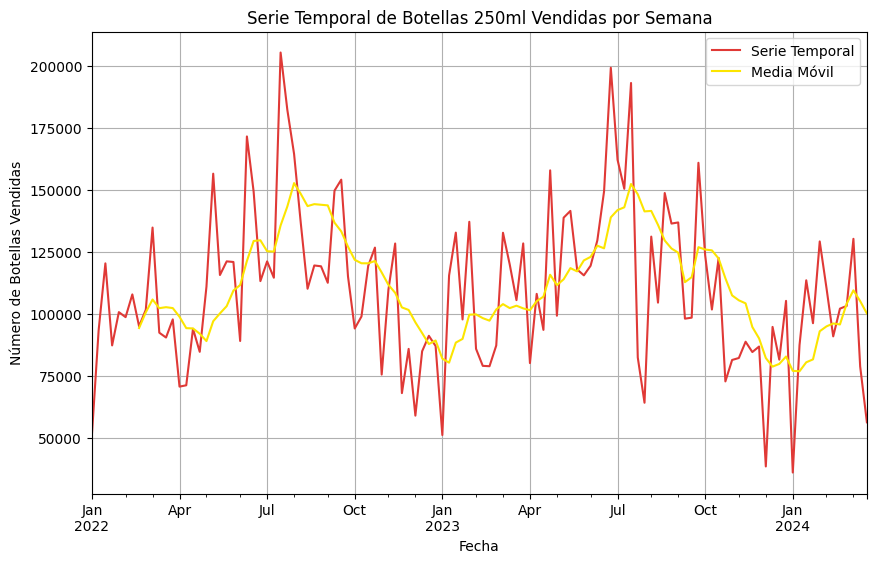

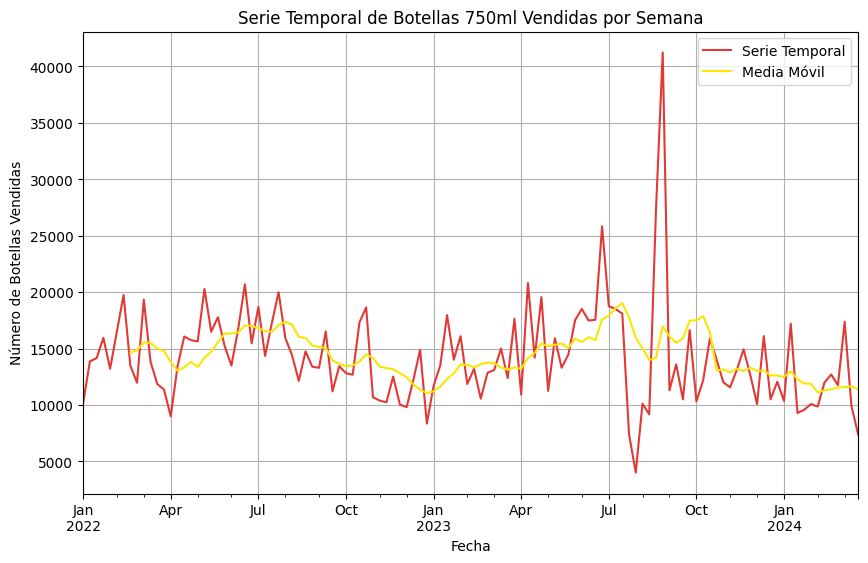

In [190]:
# Convertir las columnas de año y semana a tipo datetime para facilitar el manejo de los datos
df_drop_duplicates['fecha'] = pd.to_datetime(df_drop_duplicates['año'].astype(str) + '-' + df_drop_duplicates['semna'].astype(str) + '-1', format='%Y-%W-%w')


# Agrupar por semana y sumar el número de botellas vendidas
serie_temporal_250 = df_drop_duplicates[df_drop_duplicates['formato_ml'] == 250].groupby('fecha')['n_botellas'].sum()
# Calculamos la media móvil
media_movil_250 = serie_temporal_250.rolling(window=8).mean()

# ploteamos la Serie temporal
plt.figure(figsize=(10, 6))
serie_temporal_250.plot(color='#e03936', label='Serie Temporal')
media_movil_250.plot(color='#fce500', label='Media Móvil')
plt.title('Serie Temporal de Botellas 250ml Vendidas por Semana')
plt.xlabel('Fecha')
plt.ylabel('Número de Botellas Vendidas')
plt.grid(True)
plt.legend()
plt.show()



# Agrupar por semana y sumar el número de botellas vendidas
serie_temporal_750 = df_drop_duplicates[df_drop_duplicates['formato_ml'] == 750].groupby('fecha')['n_botellas'].sum()
# Calculamos la media móvil
media_movil_750 = serie_temporal_750.rolling(window=8).mean()

# ploteamos la Serie temporal
plt.figure(figsize=(10, 6))
serie_temporal_750.plot(color='#e03936', label='Serie Temporal')
media_movil_750.plot(color='#fce500', label='Media Móvil')
plt.title('Serie Temporal de Botellas 750ml Vendidas por Semana')
plt.xlabel('Fecha')
plt.ylabel('Número de Botellas Vendidas')
plt.grid(True)
plt.legend()
plt.show()

- Observamos que la demanda de botellas de 250ml experimenta un aumento significativo durante los meses de verano y primavera, reflejando un ciclo de ventas estacional. Por el contrario, durante los meses de invierno y otoño, la demanda tiende a disminuir
- También observamos que el ciclo de ventas de las botellas de 750ml muestra una estabilidad notable a lo largo de todos los meses del año, con variaciones mínimas en la demanda. Este patrón sugiere que factores como la estacionalidad no tienen un impacto significativo en las ventas de este producto.

- El impacto que tendrían estás conclusiones en el modelo es el siguiente:
    - Dividir los datos en dos grupos según el tamaño de las botellas y luego aplicar diferentes métodos de pronóstico a cada grupo
    - Incorporar variables estacionales, Para las botellas de 250ml, incluir variables estacionales que reflejen el aumento en la demanda durante los meses de verano y primavera, así como la disminución durante los meses de invierno y otoño. En cambio, para las botellas de 750ml, estas variables estacionales podrían tener un impacto mínimo o ser insignificantes.

- La metodología de pronóstico que proponemos emplear es un modelo de Forecasting, el cual nos permite realizar predicciones con un alto nivel de precisión sobre la cantidad de ventas que se esperan en los próximos meses o años


- Dado que la demanda de botellas de 250ml muestra un ciclo estacional marcado, es crucial ajustar la estrategia comercial para aprovechar los picos de demanda durante los meses de verano y primavera. Esto podría implicar aumentar la producción y la promoción durante estos períodos para satisfacer la demanda. Para las botellas de 750ml, dada su estabilidad a lo largo del año, se puede mantener una estrategia más constante sin necesidad de ajustes significativos basados en la temporada. Además, la implementación de un modelo de Forecasting para prever las ventas futuras ayudará a optimizar la gestión de inventario y recursos, asegurando una operación más eficiente y rentable.